In [18]:
from tensorflow.keras.datasets import mnist
import numpy as np
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [19]:
# Exploring the MNIST Data
x_train.shape
x_valid.shape
x_train.dtype
x_train.min()
x_train.max()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


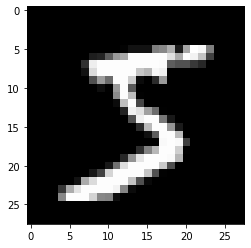

In [20]:
import matplotlib.pyplot as plt
image = x_train[0]
plt.imshow(image, cmap='gray')
print(y_train[0])

In [21]:
#Normalizing the Image Data
x_train = x_train / 255
x_valid = x_valid / 255 
x_train.dtype
print(x_train.min())
print(x_train.max())

0.0
1.0


In [22]:
#Categorical Encoding
import tensorflow.keras as keras
num_categories = 10
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
#Creating the Model
from tensorflow.keras.models import Sequential
model = Sequential()

In [24]:
#Creating the Input Layer
from tensorflow.keras.layers import Dense
model.add(Dense(units=512, activation='relu', input_shape =  (784,)))
model.add(Dense(units = 512, activation='relu'))
#Creating the Output Layer
model.add(Dense(units = 10, activation='softmax'))

In [25]:
#Summarizing the Model
model.summary()
#Compiling the Model
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
print(x_train.shape,x_valid.shape,y_train.shape,y_valid.shape)

(60000, 28, 28) (10000, 28, 28) (60000, 10) (10000, 10)


In [27]:
x_train = x_train.reshape(len(x_train), 28*28)
x_valid_f = x_valid.reshape(len(x_valid), 28*28)

In [28]:
#Training the Model
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid_f, y_valid))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1892 - accuracy: 0.9434 - val_loss: 0.1057 - val_accuracy: 0.9705
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1013 - accuracy: 0.9745 - val_loss: 0.1051 - val_accuracy: 0.9749
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0795 - accuracy: 0.9806 - val_loss: 0.1204 - val_accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0719 - accuracy: 0.9834 - val_loss: 0.1331 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0662 - accuracy: 0.9856 - val_loss: 0.1712 - val_accuracy: 0.9763


In [29]:
## Checking the accuracy
model.evaluate(x_valid_f,y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.1712 - accuracy: 0.9763


[0.1711740344762802, 0.9763000011444092]

In [31]:
## Predicting the Image
y_predicted = model.predict(x_valid_f)
np.argmax(y_predicted[0])

7

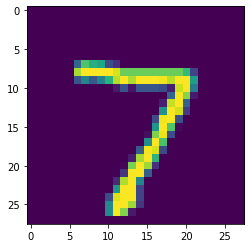

In [32]:
plt.imshow(x_valid[0])